In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [6]:
data_day = pd.read_csv(r'../data/bike+sharing+dataset/day.csv')
data_hour = pd.read_csv(r'../data/bike+sharing+dataset/hour.csv')

In [7]:
data_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [13]:
dict_mapping_mnth = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September",10:"October",11:"November", 12:"December"}
dict_mapping_year = {0:2011, 1:2011}
dict_mapping_day={0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
dict_mapping_season= {1:"winter", 2:"spring", 3:"summer", 4:"fall"}
dict_mapping_workingday = {0:"workingday", 1:"non-workingday"}
dict_mapping_holiday = {0:"No holiday", 1:"Holiday"}
dict_mapping_weather = {1:"Good", 2:"Misty", 3:"Rain/Snow"}
    

In [14]:
data_day['month_label'] = data_day['mnth'].map(dict_mapping_mnth)
data_day['year_label'] = data_day['yr'].map(dict_mapping_year)
data_day['day_label'] = data_day['weekday'].map(dict_mapping_day)
data_day['season_label'] = data_day['season'].map(dict_mapping_season)
data_day['workingday_label'] = data_day['workingday'].map(dict_mapping_workingday)
data_day['workingday_label'] = data_day['holiday'].map(dict_mapping_holiday)
data_day['weather_label'] = data_day['weathersit'].map(dict_mapping_weather)


In [15]:
data_day.columns
# temp and atemp are normalized temperate and feel like from 0 - 1

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'month_label', 'year_label', 'day_label',
       'season_label', 'workingday_label', 'weather_label', 'temp_actual',
       'temp_actual_feel'],
      dtype='object')

In [16]:
temp_min = -8
temp_max = 39
temp_feel_min = -16
temp_feel_max = 50

data_day['temp_actual'] = data_day['temp'] * (temp_max - temp_min) + temp_min
data_day['temp_actual_feel'] = data_day['atemp'] * (temp_feel_max - temp_feel_min) + temp_feel_min

In [17]:
# data['temp'][0]  * (temp_max - temp_min) + (temp_min)
data_day['atemp'][0] * (temp_feel_max - temp_feel_min) + (temp_feel_min)

7.99925

In [18]:
##Profiling data

In [19]:
data_day.dtypes

instant               int64
dteday               object
season                int64
yr                    int64
mnth                  int64
holiday               int64
weekday               int64
workingday            int64
weathersit            int64
temp                float64
atemp               float64
hum                 float64
windspeed           float64
casual                int64
registered            int64
cnt                   int64
month_label          object
year_label            int64
day_label            object
season_label         object
workingday_label     object
weather_label        object
temp_actual         float64
temp_actual_feel    float64
dtype: object

In [20]:
##EDA
#No nulls in data
data_day.isnull().any()
#Summary statistic

instant             False
dteday              False
season              False
yr                  False
mnth                False
holiday             False
weekday             False
workingday          False
weathersit          False
temp                False
atemp               False
hum                 False
windspeed           False
casual              False
registered          False
cnt                 False
month_label         False
year_label          False
day_label           False
season_label        False
workingday_label    False
weather_label       False
temp_actual         False
temp_actual_feel    False
dtype: bool

In [21]:
data_day.describe()
#Check distribution
#Check multicollinearity

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_label,temp_actual,temp_actual_feel
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.0,15.283085,15.307363
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.0,8.603397,10.755438
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2011.0,-5.220871,-10.781406
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.0,7.842925,6.297605
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,2011.0,15.421651,16.124378
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2011.0,22.804575,24.167732
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2011.0,32.498349,39.499136


In [22]:
data_day[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']].corr()
## I notice correaltion between saeason and count, yr and count, month and count, temp, atemp, windspeed,
#Weather and windpspeed
#Check homoscedasiticity

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


In [23]:
data_day['cnt']

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

(array([ 13.,  62.,  71.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([  22. ,  891.2, 1760.4, 2629.6, 3498.8, 4368. , 5237.2, 6106.4,
        6975.6, 7844.8, 8714. ]),
 <BarContainer object of 10 artists>)

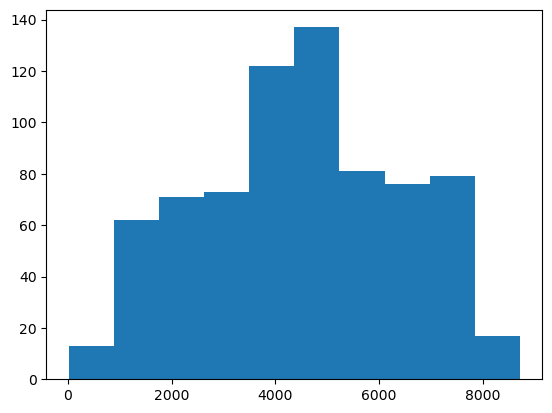

In [24]:
#distribtuion of count of rented
#linearity, normality, homoscedasticity, independence, fixed features, and absence of multicollinearity.
#distribution of rentals
plt.hist(data_day['cnt'])

In [25]:
data_day[['mnth','cnt']]

,mnth,cnt
0,1,985
1,1,801
2,1,1349
3,1,1562
4,1,1600
...,...,...
726,12,2114
727,12,3095
728,12,1341
729,12,1796


<Axes: >

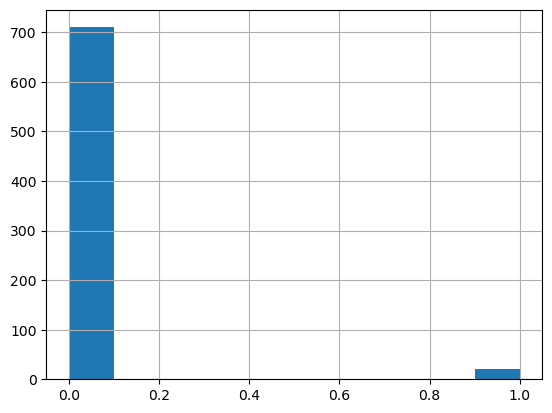

In [26]:
#frequency distribution of holidays
data_day['holiday'].hist()

<Axes: >

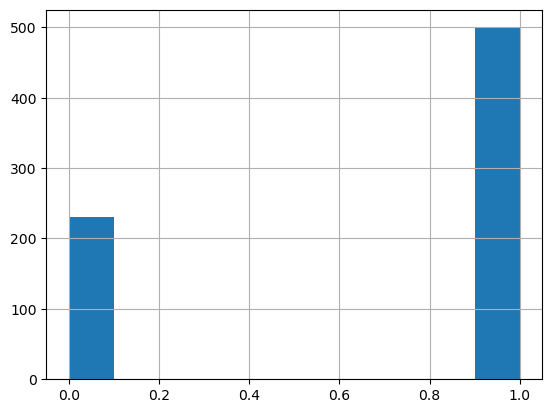

In [27]:
data_day['workingday'].hist()

In [28]:
data_day['day_label']

0       Saturday
1         Sunday
2         Monday
3        Tuesday
4      Wednesday
         ...    
726     Thursday
727       Friday
728     Saturday
729       Sunday
730       Monday
Name: day_label, Length: 731, dtype: object

In [29]:
data_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,month_label,year_label,day_label,season_label,workingday_label,weather_label,temp_actual,temp_actual_feel
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,654,985,January,2011,Saturday,winter,No holiday,Misty,8.175849,7.999250
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,670,801,January,2011,Sunday,winter,No holiday,Misty,9.083466,7.346774
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1229,1349,January,2011,Monday,winter,No holiday,Good,1.229108,-3.499270
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,1454,1562,January,2011,Tuesday,winter,No holiday,Good,1.400000,-1.999948
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,1518,1600,January,2011,Wednesday,winter,No holiday,Good,2.666979,-0.868180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,1867,2114,December,2011,Thursday,winter,No holiday,Misty,3.945849,-1.041628
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,2451,3095,December,2011,Friday,winter,No holiday,Misty,3.906651,0.833036
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,1182,1341,December,2011,Saturday,winter,No holiday,Misty,3.906651,-0.001600
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,1432,1796,December,2011,Sunday,winter,No holiday,Good,4.024151,-0.707800


In [30]:
data_day.loc[data_day['weekday']==1]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,month_label,year_label,day_label,season_label,workingday_label,weather_label,temp_actual,temp_actual_feel
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1229,1349,January,2011,Monday,winter,No holiday,Good,1.229108,-3.499270
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,...,1280,1321,January,2011,Monday,winter,No holiday,Good,-0.910849,-6.041392
16,17,2011-01-17,1,0,1,1,1,0,2,0.175833,...,883,1000,January,2011,Monday,winter,Holiday,Misty,0.264151,-4.333114
23,24,2011-01-24,1,0,1,0,1,1,1,0.097391,...,1330,1416,January,2011,Monday,winter,No holiday,Good,-3.422609,-8.216620
30,31,2011-01-31,1,0,1,0,1,1,2,0.180833,...,1459,1501,January,2011,Monday,winter,No holiday,Misty,0.499151,-3.707500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,703,2012-12-03,4,1,12,0,1,1,1,0.452500,...,5679,6234,December,2011,Monday,fall,No holiday,Good,13.267500,14.082536
709,710,2012-12-10,4,1,12,0,1,1,2,0.435833,...,4841,5170,December,2011,Monday,fall,No holiday,Misty,12.484151,12.747950
716,717,2012-12-17,4,1,12,0,1,1,2,0.393333,...,4373,4585,December,2011,Monday,fall,No holiday,Misty,10.486651,10.499000
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,...,746,920,December,2011,Monday,winter,No holiday,Misty,2.871288,1.087400


/var/folders/yc/_wvbwvdd08jb7501j7yr1mqr0000gn/T/ipykernel_13839/1977440142.py:3: FutureWarning: The provided callable <function sum at 0x110cb6020> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_daily_rental = data_day.groupby('weekday')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero).reset_index()
/var/folders/yc/_wvbwvdd08jb7501j7yr1mqr0000gn/T/ipykernel_13839/1977440142.py:3: FutureWarning: The provided callable <function mean at 0x110cb7100> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_daily_rental = data_day.groupby('weekday')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero).reset_index()


<Axes: xlabel='weekday'>

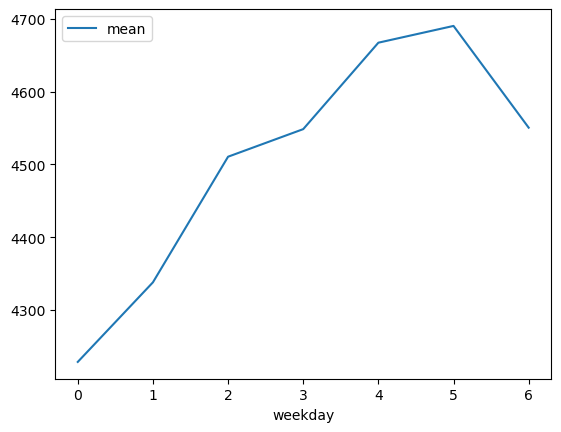

In [31]:
#avg daily rentals
#Sunday is the least ridden day and Friday the max
data_daily_rental = data_day.groupby('weekday')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero).reset_index()
data_daily_rental.plot('weekday', 'mean')

In [32]:
# additionally people prefer to bike more on non-holidays
data_day.groupby('holiday').mean('cnt')

,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_label,temp_actual,temp_actual_feel
holiday,,,,,,,,,,,,,,,,,
0,365.414085,2.498592,0.50000,6.508451,3.032394,0.704225,1.398592,0.496283,0.475264,0.628284,0.190402,841.771831,3685.332394,4527.104225,2011.0,15.325308,15.367451
1,385.809524,2.428571,0.52381,6.904762,1.809524,0.000000,1.285714,0.465012,0.443573,0.614704,0.193319,1064.714286,2670.285714,3735.000000,2011.0,13.855564,13.275834


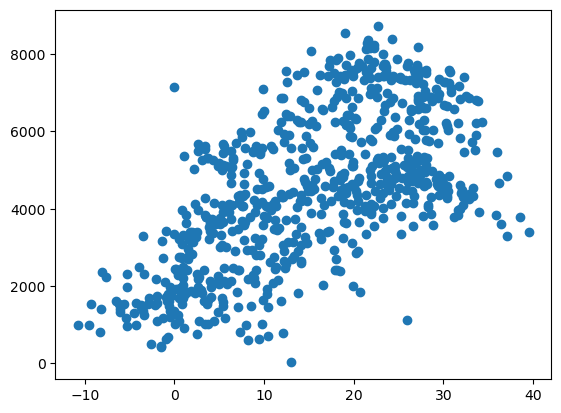

In [33]:
#relationship between temp and bike rentals
plt.scatter(data_day['temp_actual_feel'], data_day['cnt'])
#need to draw a line of best fit

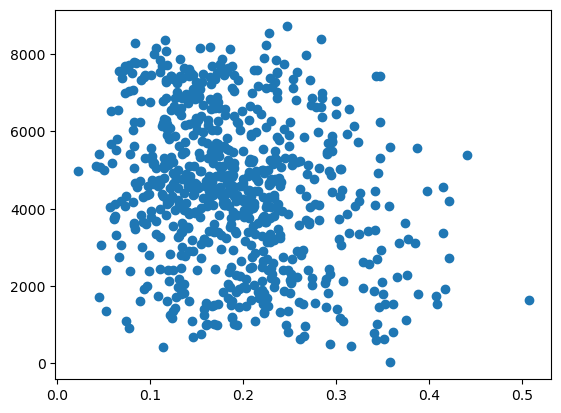

In [34]:
#relationship between windspeed and rental
plt.scatter(data_day['windspeed'], data_day['cnt'])

<Axes: xlabel='weathersit'>

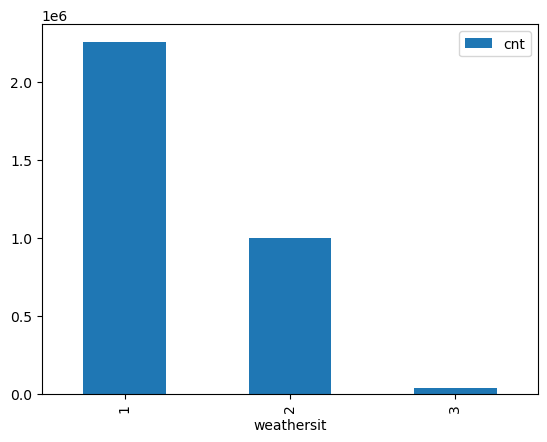

In [35]:
#rentals by with weather situation
data_day.groupby('weathersit').sum('cnt').reset_index().plot.bar('weathersit', 'cnt')

/var/folders/yc/_wvbwvdd08jb7501j7yr1mqr0000gn/T/ipykernel_13839/205148082.py:3: FutureWarning: The provided callable <function sum at 0x110cb6020> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_monthly_rental = data_day.groupby('mnth')['cnt'].agg(sum=np.sum, mean=np.mean).reset_index()
/var/folders/yc/_wvbwvdd08jb7501j7yr1mqr0000gn/T/ipykernel_13839/205148082.py:3: FutureWarning: The provided callable <function mean at 0x110cb7100> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_monthly_rental = data_day.groupby('mnth')['cnt'].agg(sum=np.sum, mean=np.mean).reset_index()


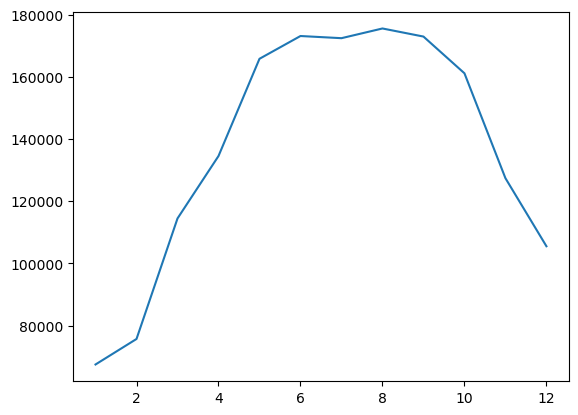

In [36]:
#avg monthly rentals
#january is the least ridden month, and August is the most
data_monthly_rental = data_day.groupby('mnth')['cnt'].agg(sum=np.sum, mean=np.mean).reset_index()
data_monthly_rental['avg_monthly'] = data_monthly_rental['sum']/2
data_monthly_rental
plt.plot(data_monthly_rental['mnth'], data_monthly_rental['avg_monthly'])

In [37]:
#Who are therse people renting
#Are there daily users
#Are there tourists
#Should we have monthly passes, tourists passes
data_monthly_user_rental = data_day.groupby('mnth').agg({'registered': ['sum', 'count'], \
                                                         'casual': ['sum', 'count']
                                                         })
                                                        
data_monthly_user_rental

registered       casual      
            sum count    sum count
mnth                              
1        122891    62  12042    62
2        136389    57  14963    57
3        184476    62  44444    62
4        208292    60  60802    60
5        256401    62  75285    62
6        272436    60  73906    60
7        266791    62  78157    62
8        279155    62  72039    62
9        275668    60  70323    60
10       262592    62  59760    62
11       218228    60  36603    60
12       189343    62  21693    62

In [38]:
data_monthly_user_rental[('casual','average')] = data_monthly_user_rental[('casual','sum')] / 2 

KeyError: ('registered', 'average')

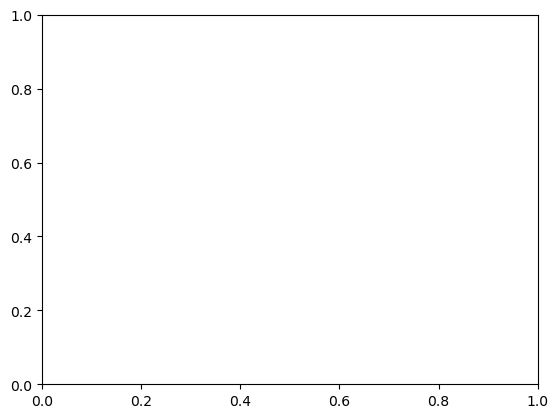

In [39]:
# stacked chart broken for users - registered vs casual
fig, ax = plt.subplots()
bottom = np.zeros(12)

species = range(12)

weight_counts = {
    "registered": np.array(data_monthly_user_rental[('registered','average')]),
    "casual": np.array(data_monthly_user_rental[('casual','average')]),
}

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width=0.5, label=boolean, bottom=bottom)
    bottom += weight_count

<Axes: xlabel='mnth'>

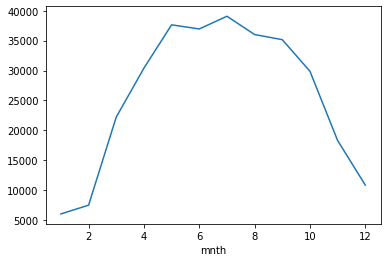

In [ ]:
# no particluar trend between users
# bike rental trend is broken similarly between both
data_monthly_user_rental[('casual','average')].plot()
data_monthly_user_rental[('registered','average')].plot()

In [40]:
data_monthly_user_rental[('casual','average')].diff()
# data_monthly_user_rental[('casual','average')].plot()

mnth
1         NaN
2      1460.5
3     14740.5
4      8179.0
5      7241.5
6      -689.5
7      2125.5
8     -3059.0
9      -858.0
10    -5281.5
11   -11578.5
12    -7455.0
Name: (casual, average), dtype: float64

In [42]:
# data_monthly_user_rental[('registered','average')].diff()

In [43]:
data_hour.groupby('hr')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero)

/var/folders/yc/_wvbwvdd08jb7501j7yr1mqr0000gn/T/ipykernel_13839/758931603.py:1: FutureWarning: The provided callable <function sum at 0x110cb6020> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_hour.groupby('hr')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero)
/var/folders/yc/_wvbwvdd08jb7501j7yr1mqr0000gn/T/ipykernel_13839/758931603.py:1: FutureWarning: The provided callable <function mean at 0x110cb7100> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_hour.groupby('hr')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero)


,sum,mean,count
hr,,,
0,39130,53.898072,726
1,24164,33.375691,724
2,16352,22.869930,715
3,8174,11.727403,697
4,4428,6.352941,697
5,14261,19.889819,717
6,55132,76.044138,725
7,154171,212.064649,727
8,261001,359.011004,727


/var/folders/yc/_wvbwvdd08jb7501j7yr1mqr0000gn/T/ipykernel_13839/312111766.py:5: FutureWarning: The provided callable <function sum at 0x110cb6020> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_hour_weekday_rental.groupby('hr')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero).reset_index().plot.bar('hr', 'mean')
/var/folders/yc/_wvbwvdd08jb7501j7yr1mqr0000gn/T/ipykernel_13839/312111766.py:5: FutureWarning: The provided callable <function mean at 0x110cb7100> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_hour_weekday_rental.groupby('hr')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero).reset_index().plot.bar('hr', 'mean')


<Axes: xlabel='hr'>

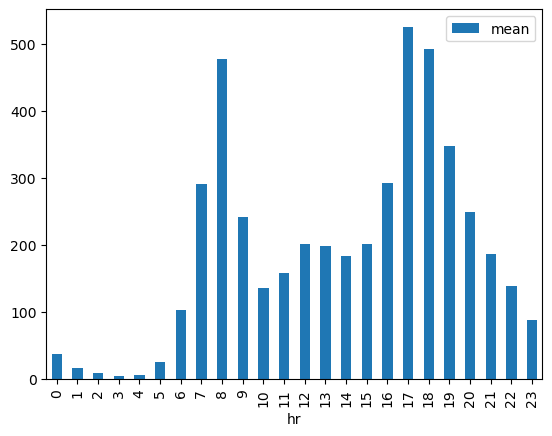

In [44]:
#hourly rentlals on the week days 
# busy in the morning at 8, 9 and evening 5 and 6
# possible people using it during work hours
data_hour_weekday_rental = data_hour.loc[data_hour['workingday']==1]
data_hour_weekday_rental.groupby('hr')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero).reset_index().plot.bar('hr', 'mean')

/var/folders/yc/_wvbwvdd08jb7501j7yr1mqr0000gn/T/ipykernel_13839/3176697534.py:4: FutureWarning: The provided callable <function sum at 0x110cb6020> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_hour_weekend_rental.groupby('hr')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero).reset_index().plot.bar('hr', 'mean')
/var/folders/yc/_wvbwvdd08jb7501j7yr1mqr0000gn/T/ipykernel_13839/3176697534.py:4: FutureWarning: The provided callable <function mean at 0x110cb7100> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_hour_weekend_rental.groupby('hr')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero).reset_index().plot.bar('hr', 'mean')


<Axes: xlabel='hr'>

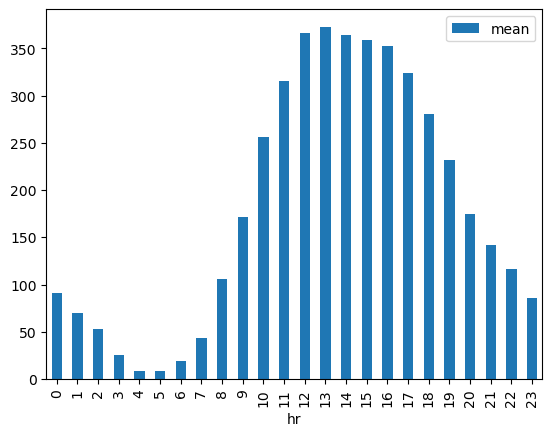

In [45]:
#hourly rental on the weekends
# busy in the afternoon to early evening from 12 to 5
data_hour_weekend_rental = data_hour.loc[data_hour['workingday']==0]
data_hour_weekend_rental.groupby('hr')['cnt'].agg(sum=np.sum, mean=np.mean, count=np.count_nonzero).reset_index().plot.bar('hr', 'mean')

In [46]:
#Who are therse people renting
#Are there daily users
#Are there tourists
#Should we have monthly passes, tourists passes
data_hourly_weekday_user_rental = data_hour_weekday_rental.groupby('hr').agg({'registered': ['sum', 'count', 'mean'], \
                                                         'casual': ['sum', 'count', 'mean']
                                                         })
                                                        

In [47]:
data_hourly_weekday_user_rental.reset_index()

hr registered                   casual                 
              sum count        mean    sum count       mean
0    0      14700   496   29.637097   3546   496   7.149194
1    1       6344   494   12.842105   1833   494   3.710526
2    2       3188   487    6.546201   1041   487   2.137577
3    3       1895   470    4.031915    428   470   0.910638
4    4       2192   470    4.663830    360   470   0.765957
5    5      11703   495   23.642424    629   495   1.270707
6    6      48698   496   98.181452   2142   496   4.318548
7    7     138095   496  278.417339   6049   496  12.195565
8    8     225552   496  454.741935  11043   496  22.264113
9    9     107734   496  217.205645  12059   496  24.312500
10  10      51664   496  104.161290  15478   496  31.205645
11  11      59833   496  120.631048  18649   496  37.598790
12  12      79253   497  159.462777  20555   497  41.358149
13  13      77619   498  155.861446  21199   498  42.568273
14  14      68576   498  137.702811  22843   498  45.869478
15  15      77189   498  154.997992  23074   498  46.333333
16  16     122144   499  244.777555  24124   499  48.344689
17  17     233729   499  468.394790  28391   499  56.895792
18  18     220004   498  441.775100  25125   498  50.451807
19  19     153075   498  307.379518  20429   498  41.022088
20  20     108738   498  218.349398  15622   498  31.369478
21  21      80515   498  161.676707  12256   498  24.610442
22  22      59171   498  118.817269   9747   498  19.572289
23  23      37514   498   75.329317   6663   498  13.379518

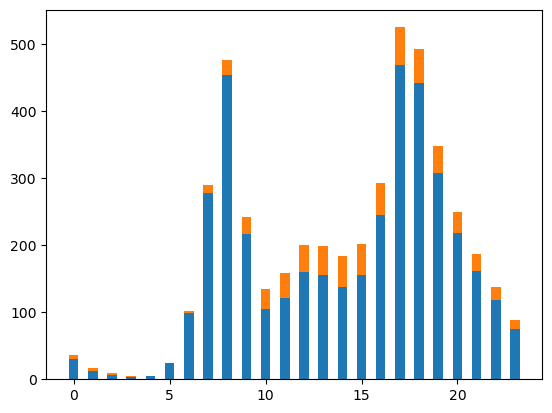

In [48]:
fig, ax = plt.subplots()
bottom = np.zeros(24)

species = range(24)

weight_counts = {
    "registered": np.array(data_hourly_weekday_user_rental[('registered','mean')]),
    "casual": np.array(data_hourly_weekday_user_rental[('casual','mean')]),
}

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width=0.5, label=boolean, bottom=bottom)
    bottom += weight_count


In [49]:
#Who are therse people renting
#Are there daily users
#Are there tourists
#Should we have monthly passes, tourists passes
data_hourly_weekend_user_rental = data_hour_weekend_rental.groupby('hr').agg({'registered': ['sum', 'count', 'mean'], \
                                                         'casual': ['sum', 'count', 'mean']})
                                                        

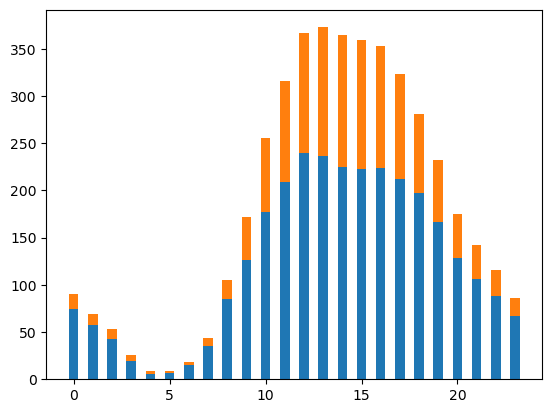

In [50]:
fig, ax = plt.subplots()
bottom = np.zeros(24)

species = range(24)

weight_counts = {
    "registered": np.array(data_hourly_weekend_user_rental[('registered','mean')]),
    "casual": np.array(data_hourly_weekend_user_rental[('casual','mean')]),
}

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width=0.5, label=boolean, bottom=bottom)
    bottom += weight_count

In [51]:
#multicorrelation
#windspeed with temp, season, humidity
#season, temp, humiditiy, windpseed

In [106]:
model_temp_cnt = sm.OLS(data_day['cnt'],data_day['temp'])
results_temp_cnt= model_temp_cnt.fit()
print(results_temp_cnt.summary())
## adjusted R squared: high - means temp explains model well
## p score: low - means unlikely that we wouild get the same reuslt by chance alonme and there is significant influence of temp on cnt

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              6435.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:52:33   Log-Likelihood:                         -6414.2
No. Observations:                 731   AIC:                                  1.283e+04
Df Residuals:                     730   BIC:                                  1.283e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [109]:
model_hum_cnt = sm.OLS(data_day['cnt'],data_day['hum'])
results_hum_cnt= model_hum_cnt.fit()
print(results_hum_cnt.summary())
## adjusted R squared: high - means humidity explains model well
## p score: low - means unlikely that we wouild get the same reuslt by chance alonme and there is significant influence of temp on cnt
# t lower than for temp

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              2700.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                   1.81e-247
Time:                        13:55:43   Log-Likelihood:                         -6683.4
No. Observations:                 731   AIC:                                  1.337e+04
Df Residuals:                     730   BIC:                                  1.337e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [110]:
model_wind_cnt = sm.OLS(data_day['cnt'],data_day['windspeed'])
results_wind_cnt= model_wind_cnt.fit()
print(results_wind_cnt.summary())
## adjusted R squared: Mid - means humidity explains model DECENT??
## p score: low - means unlikely that we wouild get the same reuslt by chance alonme and there is significant influence of temp on cnt
# t lower than for temp

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.666
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              1457.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                   4.27e-176
Time:                        13:57:30   Log-Likelihood:                         -6847.9
No. Observations:                 731   AIC:                                  1.370e+04
Df Residuals:                     730   BIC:                                  1.370e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [111]:
model_season_cnt = sm.OLS(data_day['cnt'],data_day['season'])
results_season_cnt= model_season_cnt.fit()
print(results_season_cnt.summary())
## adjusted R squared: High - means humidity explains model well
## p score: low - means unlikely that we wouild get the same reuslt by chance alonme and there is significant influence of temp on cnt
# t lower than for temp

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              3290.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                   1.26e-272
Time:                        13:59:27   Log-Likelihood:                         -6625.5
No. Observations:                 731   AIC:                                  1.325e+04
Df Residuals:                     730   BIC:                                  1.326e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [115]:
model_weather_cnt = sm.OLS(data_day['cnt'],data_day['weathersit'])
results_weather_cnt= model_weather_cnt.fit()
print(results_weather_cnt.summary())
## adjusted R squared: Mid -  explains model DECENT?
## p score: low - means unlikely that we wouild get the same reuslt by chance alonme and there is significant influence of temp on cnt
# t lower than for temp

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.661
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              1425.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                   8.95e-174
Time:                        14:01:37   Log-Likelihood:                         -6853.3
No. Observations:                 731   AIC:                                  1.371e+04
Df Residuals:                     730   BIC:                                  1.371e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [144]:
model_workday_registered = sm.OLS(data_day['registered'],data_day['workingday'])
results_workday_registered= model_workday_registered.fit()
print(results_workday_registered.summary())
## adjusted R squared: High Mid -  explains model DECENT?
## p score: low - means unlikely that we wouild get the same reuslt by chance alonme and there is significant influence of temp on cnt

                                 OLS Regression Results                                
Dep. Variable:             registered   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              1589.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                   2.16e-185
Time:                        14:12:25   Log-Likelihood:                         -6673.1
No. Observations:                 731   AIC:                                  1.335e+04
Df Residuals:                     730   BIC:                                  1.335e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [102]:
data_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'month_label', 'year_label', 'day_label',
       'season_label', 'workingday_label', 'weather_label', 'temp_actual',
       'temp_actual_feel'],
      dtype='object')

In [114]:
data_day['season']

0      1
1      1
2      1
3      1
4      1
      ..
726    1
727    1
728    1
729    1
730    1
Name: season, Length: 731, dtype: int64